# **MIE 1624 Introduction to Data Science and Analytics – Winter 2023**

# **Assignment 2**


Anbumanivel Mohan Suganthi - 100696653 <br>
March 12, 2023

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, f1_score
from sklearn.linear_model import Lasso, LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the Data
data = pd.read_csv('clean_kaggle_data_2022.csv', encoding= 'unicode_escape')

In [ ]:
data.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


In [ ]:
data.shape

(8137, 298)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Columns: 298 entries, Duration (in seconds) to Q29_buckets
dtypes: float64(1), object(297)
memory usage: 18.5+ MB


# **Q1. Data cleaning**

i). Dropping the feature 'Duration (in seconds)' since survey duration is not related to target. Also, feature 'Q29' is removed because 'Q29_Encoded' and 'Q29_buckets' can replace them.

In [ ]:
data=data.drop(['Duration (in seconds)', 'Q29'], axis=1)

ii). Dropping features that are irrevelent to the target. The following questions are dropped: Q5, Q6, Q7, Q9, Q14, Q26, Q32, Q35, Q44.

In [ ]:
column_name = list(data.columns)
remove_col=[]
for col in column_name:
  if col.startswith('Q5')|col.startswith('Q6')|col.startswith('Q7')|col.startswith('Q9')|col.startswith('Q14')|col.startswith('Q26')|col.startswith('Q32')|col.startswith('Q35')|col.startswith('Q44'):
    remove_col.append(col)
len(remove_col)

67

In [ ]:
data=data.drop(remove_col, axis=1)

In [ ]:
data

,Q2,Q3,Q4,Q8,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,...,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q29_Encoded,Q29_buckets
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Did your research make use of machine learning...,Did your research make use of machine learning...,Did your research make use of machine learning...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Approximately how many times have you used a T...,NaN,NaN
1,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,10-20 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,NaN,NaN,NaN,10-20 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,NaN,"Yes, the research made use of machine learning...",NaN,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,Never,10.0,"100,000-124,999"
4,40-44,Man,United States of America,Doctoral degree,"Yes, the research made advances related to som...",NaN,NaN,10-20 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,MasterEEs degree,NaN,NaN,NaN,10-20 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
8133,35-39,Man,India,MasterEEs degree,NaN,NaN,NaN,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,Never,0.0,"0-9,999"
8134,40-44,Man,India,BachelorEEs degree,NaN,NaN,NaN,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8135,25-29,Man,Turkey,MasterEEs degree,NaN,NaN,No,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,Never,2.0,"20,000-29,999"


iii). Removing columns having "Other" values. Since it does not provide any useful information.

In [ ]:
# Removing columns with "Other" value
other_col=['Q6_12','Q7_7','Q12_5','Q13_14','Q14_16','Q15_15','Q17_15','Q18_14','Q19_8','Q20_6','Q28_8','Q31_12','Q33_5','Q34_8','Q35_16','Q36_15','Q37_13','Q38_8','Q39_12','Q40_15','Q41_9','Q42_9','Q44_12']
len(other_col)

23

In [ ]:
a=[]
for i in other_col:
  if i not in data.columns:
    a.append(i)

for i in a:
  other_col.remove(i)
print(len(other_col))
data=data.drop(other_col, axis=1)

18


In [ ]:
data

,Q2,Q3,Q4,Q8,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,...,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q43,Q29_Encoded,Q29_buckets
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Did your research make use of machine learning...,Did your research make use of machine learning...,Did your research make use of machine learning...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Do you use any of the following types of speci...,Approximately how many times have you used a T...,NaN,NaN
1,55-59,Man,France,Some college/university study without earning ...,NaN,NaN,NaN,10-20 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,NaN,NaN,NaN,10-20 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,NaN,"Yes, the research made use of machine learning...",NaN,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,Never,10.0,"100,000-124,999"
4,40-44,Man,United States of America,Doctoral degree,"Yes, the research made advances related to som...",NaN,NaN,10-20 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-5 times,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,40-44,Man,United States of America,MasterEEs degree,NaN,NaN,NaN,10-20 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
8133,35-39,Man,India,MasterEEs degree,NaN,NaN,NaN,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,Never,0.0,"0-9,999"
8134,40-44,Man,India,BachelorEEs degree,NaN,NaN,NaN,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8135,25-29,Man,Turkey,MasterEEs degree,NaN,NaN,No,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,Never,2.0,"20,000-29,999"


iv). Dropping columns which have 80% or more missing values

In [ ]:
b = data.isnull().sum()
print(b)

Q2                0
Q3                0
Q4                0
Q8                0
Q10_1          7452
               ... 
Q42_7          8078
Q42_8          6440
Q43            3723
Q29_Encoded       1
Q29_buckets       1
Length: 211, dtype: int64


In [ ]:
del_column=[]
col = list(data.columns)
for i,j in enumerate(col):
  temp=(b[i]/len(data))*100
  if temp>=80:
    del_column.append(j)

In [ ]:
del_column

['Q10_1',
 'Q10_2',
 'Q10_3',
 'Q12_4',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q12_15',
 'Q13_2',
 'Q13_3',
 'Q13_6',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_12',
 'Q13_13',
 'Q15_5',
 'Q15_6',
 'Q15_7',
 'Q15_8',
 'Q15_9',
 'Q15_10',
 'Q15_11',
 'Q15_12',
 'Q15_13',
 'Q15_14',
 'Q17_5',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_8',
 'Q18_9',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q19_1',
 'Q19_2',
 'Q19_3',
 'Q19_4',
 'Q19_5',
 'Q19_6',
 'Q19_7',
 'Q20_1',
 'Q20_2',
 'Q20_3',
 'Q20_4',
 'Q20_5',
 'Q21_1',
 'Q21_2',
 'Q21_3',
 'Q21_4',
 'Q21_5',
 'Q21_6',
 'Q21_7',
 'Q21_10',
 'Q22',
 'Q28_6',
 'Q28_7',
 'Q31_2',
 'Q31_4',
 'Q31_5',
 'Q31_6',
 'Q31_7',
 'Q31_8',
 'Q31_9',
 'Q31_10',
 'Q31_11',
 'Q33_1',
 'Q33_2',
 'Q33_3',
 'Q33_4',
 'Q34_1',
 'Q34_2',
 'Q34_3',
 'Q34_4',
 'Q34_5',
 'Q34_6',
 'Q34_7',
 'Q36_1',
 'Q36_2',
 'Q36_3',
 'Q36_4',
 'Q36_

In [ ]:
# Removing the 1st row since it contains the description of the questions
data=data.drop(index=0)
data=data.drop(del_column, axis=1)
pd.set_option('display.max_columns', None)
data.head()

,Q2,Q3,Q4,Q8,Q11,Q12_1,Q12_2,Q12_3,Q13_1,Q13_4,Q13_5,Q13_7,Q13_11,Q15_1,Q15_2,Q15_3,Q15_4,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_6,Q18_1,Q18_2,Q18_3,Q18_7,Q21_8,Q21_9,Q23,Q24,Q25,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q30,Q31_1,Q31_3,Q36_5,Q36_14,Q37_12,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q42_8,Q43,Q29_Encoded,Q29_buckets
1,55-59,Man,France,Some college/university study without earning ...,10-20 years,Python,NaN,SQL,NaN,Visual Studio Code (VSCode),NaN,NaN,Jupyter Notebook,Matplotlib,Seaborn,NaN,NaN,1-2 years,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Scientist,Online Service/Internet-based Services,0-49 employees,"We recently started using ML methods (i.e., mo...",NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,"$1000-$9,999",NaN,NaN,NaN,None,No / None,No / None,NaN,NaN,None,GPUs,NaN,2-5 times,2.0,"20,000-29,999"
2,30-34,Man,Germany,BachelorEEs degree,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,Jupyter Notebook,Matplotlib,NaN,NaN,Ggplot / ggplot2,4-5 years,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,Software Engineer,Insurance/Risk Assessment,250-999 employees,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,70+,Man,Australia,Doctoral degree,20+ years,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,Jupyter Notebook,NaN,NaN,Plotly / Plotly Express,NaN,5-10 years,NaN,NaN,Keras,NaN,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,"No, I do not download pre-trained model weight...",Research Scientist,Government/Public Service,"1000-9,999 employees","We recently started using ML methods (i.e., mo...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,$100-$999,Amazon Web Services (AWS),Google Cloud Platform (GCP),NaN,None,No / None,No / None,None,No / None,None,NaN,None,Never,10.0,"100,000-124,999"
4,40-44,Man,United States of America,Doctoral degree,10-20 years,Python,R,SQL,JupyterLab,Visual Studio Code (VSCode),NaN,NaN,Jupyter Notebook,NaN,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,5-10 years,Scikit-learn,TensorFlow,Keras,PyTorch,Xgboost,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Convolutional Neural Networks,NaN,NaN,Developer Advocate,Computers/Technology,"1000-9,999 employees","We have well established ML methods (i.e., mod...",NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,$100-$999,Amazon Web Services (AWS),NaN,Tableau,NaN,NaN,NaN,NaN,NaN,None,GPUs,NaN,2-5 times,13.0,"200,000-299,999"
5,40-44,Man,United States of America,MasterEEs degree,10-20 years,Python,NaN,SQL,JupyterLab,Visual Studio Code (VSCode),NaN,NaN,NaN,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,5-10 years,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,NaN,Data Scientist,Computers/Technology,"1000-9,999 employees","We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,"$100,000 or more ($USD)",Amazon Web Services (AWS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,GPUs,NaN,More than 25 times,13.0,"200,000-299,999"


In [ ]:
print("Total number of columns remaining:", data.shape[1])

Total number of columns remaining: 53


In [ ]:
data.columns

Index(['Q2', 'Q3', 'Q4', 'Q8', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q13_1',
       'Q13_4', 'Q13_5', 'Q13_7', 'Q13_11', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4',
       'Q16', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_6', 'Q18_1', 'Q18_2',
       'Q18_3', 'Q18_7', 'Q21_8', 'Q21_9', 'Q23', 'Q24', 'Q25', 'Q27', 'Q28_1',
       'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q30', 'Q31_1', 'Q31_3', 'Q36_5',
       'Q36_14', 'Q37_12', 'Q38_7', 'Q39_11', 'Q40_14', 'Q41_8', 'Q42_1',
       'Q42_8', 'Q43', 'Q29_Encoded', 'Q29_buckets'],
      dtype='object')

iv). Dropping 'Q29_buckets' column as it is already encoded as 'Q29_Encoded'

In [ ]:
df=data.drop(['Q29_buckets'], axis=1)

v). Filling missing values for the features that are chosen for ordinal encoding. And performing Ordinal Encoding.

In [ ]:
Ordinal_features = ['Q8', 'Q11', 'Q16', 'Q25', 'Q30', 'Q43']
df[Ordinal_features].isnull().sum()

Q8        0
Q11       0
Q16     684
Q25       0
Q30      50
Q43    3723
dtype: int64

In [ ]:
# Filling missing values with the most common value for ordinal features
df.mode()

,Q2,Q3,Q4,Q8,Q11,Q12_1,Q12_2,Q12_3,Q13_1,Q13_4,Q13_5,Q13_7,Q13_11,Q15_1,Q15_2,Q15_3,Q15_4,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_6,Q18_1,Q18_2,Q18_3,Q18_7,Q21_8,Q21_9,Q23,Q24,Q25,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q30,Q31_1,Q31_3,Q36_5,Q36_14,Q37_12,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q42_8,Q43,Q29_Encoded
0,25-29,Man,India,MasterEEs degree,1-3 years,Python,R,SQL,JupyterLab,Visual Studio Code (VSCode),PyCharm,Notepad++,Jupyter Notebook,Matplotlib,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,Under 1 year,Scikit-learn,TensorFlow,Keras,PyTorch,Xgboost,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Convolutional Neural Networks,Kaggle datasets,"No, I do not download pre-trained model weight...",Data Scientist,Computers/Technology,"10,000 or more employees",No (we do not use ML methods),Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,$0 ($USD),Amazon Web Services (AWS),Google Cloud Platform (GCP),Tableau,None,No / None,No / None,None,No / None,None,GPUs,None,Never,0.0


In [ ]:
values = {"Q16": df['Q16'].mode()[0], "Q30": df['Q30'].mode()[0], "Q43": df['Q43'].mode()[0],}
values

{'Q16': 'Under 1 year', 'Q30': '$0 ($USD)', 'Q43': 'Never'}

In [ ]:
df = df.fillna(value=values)

In [ ]:
df[Ordinal_features].isnull().sum()

Q8     0
Q11    0
Q16    0
Q25    0
Q30    0
Q43    0
dtype: int64

In [ ]:
# Changing the values with unnecessary characters to original value 
df.loc[df['Q8'].str.startswith('Bachelor'), 'Q8'] = "Bachelor's Degree"
df.loc[df['Q8'].str.startswith('Master'), 'Q8'] = "Master's Degree"
df.loc[df['Q8'].str.startswith('Some college/university'), 'Q8'] = "Some college/university study without earning a bachelor's degree"

In [ ]:
df['Q8'].value_counts()

Master's Degree                                                      3567
Bachelor's Degree                                                    2005
Doctoral degree                                                      1349
I prefer not to answer                                                426
Some college/university study without earning a bachelor's degree     304
Professional doctorate                                                279
No formal education past high school                                  206
Name: Q8, dtype: int64

In [ ]:
df['Q8'].unique()

array(["Some college/university study without earning a bachelor's degree",
       "Bachelor's Degree", 'Doctoral degree', "Master's Degree",
       'I prefer not to answer', 'No formal education past high school',
       'Professional doctorate'], dtype=object)

In [ ]:
# Ordinal Encoding for 'Q8'
Q8_order = [['I prefer not to answer', 'No formal education past high school', "Some college/university study without earning a bachelor's degree", "Bachelor's Degree", "Master's Degree", 'Doctoral degree', 'Professional doctorate']]
Ordinal_enc_Q8 = OrdinalEncoder(categories = Q8_order)
df['Q8'] = Ordinal_enc_Q8.fit_transform(df['Q8'].values.reshape(-1,1))

In [ ]:
df['Q11'].unique()

array(['10-20 years', '20+ years', '5-10 years', '3-5 years', '< 1 years',
       '1-3 years', 'I have never written code'], dtype=object)

In [ ]:
# Ordinal Encoding for 'Q11'
Q11_order = [['I have never written code', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']]
Ordinal_enc_Q11 = OrdinalEncoder(categories = Q11_order)
df['Q11'] = Ordinal_enc_Q11.fit_transform(df['Q11'].values.reshape(-1,1))

In [ ]:
df['Q16'].unique()

array(['1-2 years', '4-5 years', '5-10 years', '2-3 years',
       'Under 1 year', '3-4 years', '10-20 years',
       'I do not use machine learning methods'], dtype=object)

In [ ]:
# Ordinal Encoding for 'Q16'
Q16_order = [['I do not use machine learning methods', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years']]
Ordinal_enc_Q16 = OrdinalEncoder(categories = Q16_order)
df['Q16'] = Ordinal_enc_Q16.fit_transform(df['Q16'].values.reshape(-1,1))

In [ ]:
df['Q25'].unique()

array(['0-49 employees', '250-999 employees', '1000-9,999 employees',
       '50-249 employees', '10,000 or more employees'], dtype=object)

In [ ]:
# Ordinal Encoding for 'Q25'
Q25_order = [['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '10,000 or more employees']]
Ordinal_enc_Q25 = OrdinalEncoder(categories = Q25_order)
df['Q25'] = Ordinal_enc_Q25.fit_transform(df['Q25'].values.reshape(-1,1))

In [ ]:
df['Q30'].unique()

array(['$1000-$9,999', '$0 ($USD)', '$100-$999',
       '$100,000 or more ($USD)', '$1-$99', '$10,000-$99,999'],
      dtype=object)

In [ ]:
# Ordinal Encoding for 'Q30'
Q30_order = [['$0 ($USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '$100,000 or more ($USD)']]
Ordinal_enc_Q30 = OrdinalEncoder(categories = Q30_order)
df['Q30'] = Ordinal_enc_Q30.fit_transform(df['Q30'].values.reshape(-1,1))

In [ ]:
df['Q43'].unique()

array(['2-5 times', 'Never', 'More than 25 times', 'Once', '6-25 times'],
      dtype=object)

In [ ]:
# Ordinal Encoding for 'Q43'
Q43_order = [['Never', 'Once', '2-5 times', '6-25 times', 'More than 25 times']]
Ordinal_enc_Q43 = OrdinalEncoder(categories = Q43_order)
df['Q43'] = Ordinal_enc_Q43.fit_transform(df['Q43'].values.reshape(-1,1))

In [ ]:
df.isnull().sum()

Q2                0
Q3                0
Q4                0
Q8                0
Q11               0
Q12_1          1615
Q12_2          6397
Q12_3          4277
Q13_1          6177
Q13_4          4791
Q13_5          6127
Q13_7          6500
Q13_11         3166
Q15_1          2895
Q15_2          4023
Q15_3          5860
Q15_4          6425
Q16               0
Q17_1          3399
Q17_2          5066
Q17_3          5527
Q17_4          5963
Q17_6          5917
Q18_1          3473
Q18_2          4154
Q18_3          5406
Q18_7          5703
Q21_8          6189
Q21_9          5097
Q23               0
Q24               0
Q25               0
Q27               0
Q28_1          3419
Q28_2          5649
Q28_3          5248
Q28_4          6068
Q28_5          5907
Q30               0
Q31_1          5884
Q31_3          6150
Q36_5          6462
Q36_14         6173
Q37_12         5245
Q38_7          4748
Q39_11         4951
Q40_14         5327
Q41_8          4373
Q42_1          5555
Q42_8          6440


vi). Performing Label Encoding for remaining categorical features.

In [ ]:
Label_features = ['Q2', 'Q3', 'Q4', 'Q23', 'Q24', 'Q27']

In [ ]:
# Label Encoding
label_enc = LabelEncoder()
for label in Label_features:
  df[label] = label_enc.fit_transform(df[label])
df.head()

,Q2,Q3,Q4,Q8,Q11,Q12_1,Q12_2,Q12_3,Q13_1,Q13_4,Q13_5,Q13_7,Q13_11,Q15_1,Q15_2,Q15_3,Q15_4,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_6,Q18_1,Q18_2,Q18_3,Q18_7,Q21_8,Q21_9,Q23,Q24,Q25,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q30,Q31_1,Q31_3,Q36_5,Q36_14,Q37_12,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q42_8,Q43,Q29_Encoded
1,8,0,15,2.0,5.0,Python,NaN,SQL,NaN,Visual Studio Code (VSCode),NaN,NaN,Jupyter Notebook,Matplotlib,Seaborn,NaN,NaN,2.0,Scikit-learn,NaN,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,11,0.0,4,NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,3.0,NaN,NaN,NaN,None,No / None,No / None,NaN,NaN,None,GPUs,NaN,2.0,2.0
2,3,0,16,3.0,5.0,Python,NaN,SQL,NaN,NaN,NaN,NaN,Jupyter Notebook,Matplotlib,NaN,NaN,Ggplot / ggplot2,5.0,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,11,6,2.0,3,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,10.0
3,10,0,2,5.0,6.0,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,Jupyter Notebook,NaN,NaN,Plotly / Plotly Express,NaN,6.0,NaN,NaN,Keras,NaN,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,"No, I do not download pre-trained model weight...",10,5,3.0,4,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,2.0,Amazon Web Services (AWS),Google Cloud Platform (GCP),NaN,None,No / None,No / None,None,No / None,None,NaN,None,0.0,10.0
4,5,0,55,5.0,5.0,Python,R,SQL,JupyterLab,Visual Studio Code (VSCode),NaN,NaN,Jupyter Notebook,NaN,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,6.0,Scikit-learn,TensorFlow,Keras,PyTorch,Xgboost,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Convolutional Neural Networks,NaN,NaN,5,3,3.0,3,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,2.0,Amazon Web Services (AWS),NaN,Tableau,NaN,NaN,NaN,NaN,NaN,None,GPUs,NaN,2.0,13.0
5,5,0,55,4.0,5.0,Python,NaN,SQL,JupyterLab,Visual Studio Code (VSCode),NaN,NaN,NaN,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,6.0,Scikit-learn,TensorFlow,Keras,PyTorch,NaN,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,NaN,4,3,3.0,3,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,5.0,Amazon Web Services (AWS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,GPUs,NaN,4.0,13.0


vii). Filling the missing values for the remaining features with 0 and replacing the existing values with 1.

In [ ]:
remaining_col = list(df.columns)
remaining_col.remove('Q29_Encoded')
for i in Ordinal_features:
  remaining_col.remove(i)
for j in Label_features:
  remaining_col.remove(j)
remaining_col

['Q12_1',
 'Q12_2',
 'Q12_3',
 'Q13_1',
 'Q13_4',
 'Q13_5',
 'Q13_7',
 'Q13_11',
 'Q15_1',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_6',
 'Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_7',
 'Q21_8',
 'Q21_9',
 'Q28_1',
 'Q28_2',
 'Q28_3',
 'Q28_4',
 'Q28_5',
 'Q31_1',
 'Q31_3',
 'Q36_5',
 'Q36_14',
 'Q37_12',
 'Q38_7',
 'Q39_11',
 'Q40_14',
 'Q41_8',
 'Q42_1',
 'Q42_8']

In [ ]:
remaining_col_values=[]
for i in remaining_col:
  remaining_col_values.append(df[i].mode()[0])

In [ ]:
for i,j in enumerate(remaining_col):
  df[j] = df[j].replace(remaining_col_values[i],1)
df = df.fillna(0)

In [ ]:
df

,Q2,Q3,Q4,Q8,Q11,Q12_1,Q12_2,Q12_3,Q13_1,Q13_4,Q13_5,Q13_7,Q13_11,Q15_1,Q15_2,Q15_3,Q15_4,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_6,Q18_1,Q18_2,Q18_3,Q18_7,Q21_8,Q21_9,Q23,Q24,Q25,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q30,Q31_1,Q31_3,Q36_5,Q36_14,Q37_12,Q38_7,Q39_11,Q40_14,Q41_8,Q42_1,Q42_8,Q43,Q29_Encoded
1,8,0,15,2.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,11,0.0,4,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0
2,3,0,16,3.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11,6,2.0,3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,10,0,2,5.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,10,5,3.0,4,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0
4,5,0,55,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5,3,3.0,3,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,13.0
5,5,0,55,4.0,5.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4,3,3.0,3,1.0,1.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5,0,55,4.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2,1,4.0,3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
8133,4,0,20,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4,2,4.0,3,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8134,5,0,20,3.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8135,2,0,51,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,6,4,4.0,1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0


# **Q2. Exploratory data analysis and feature selection**

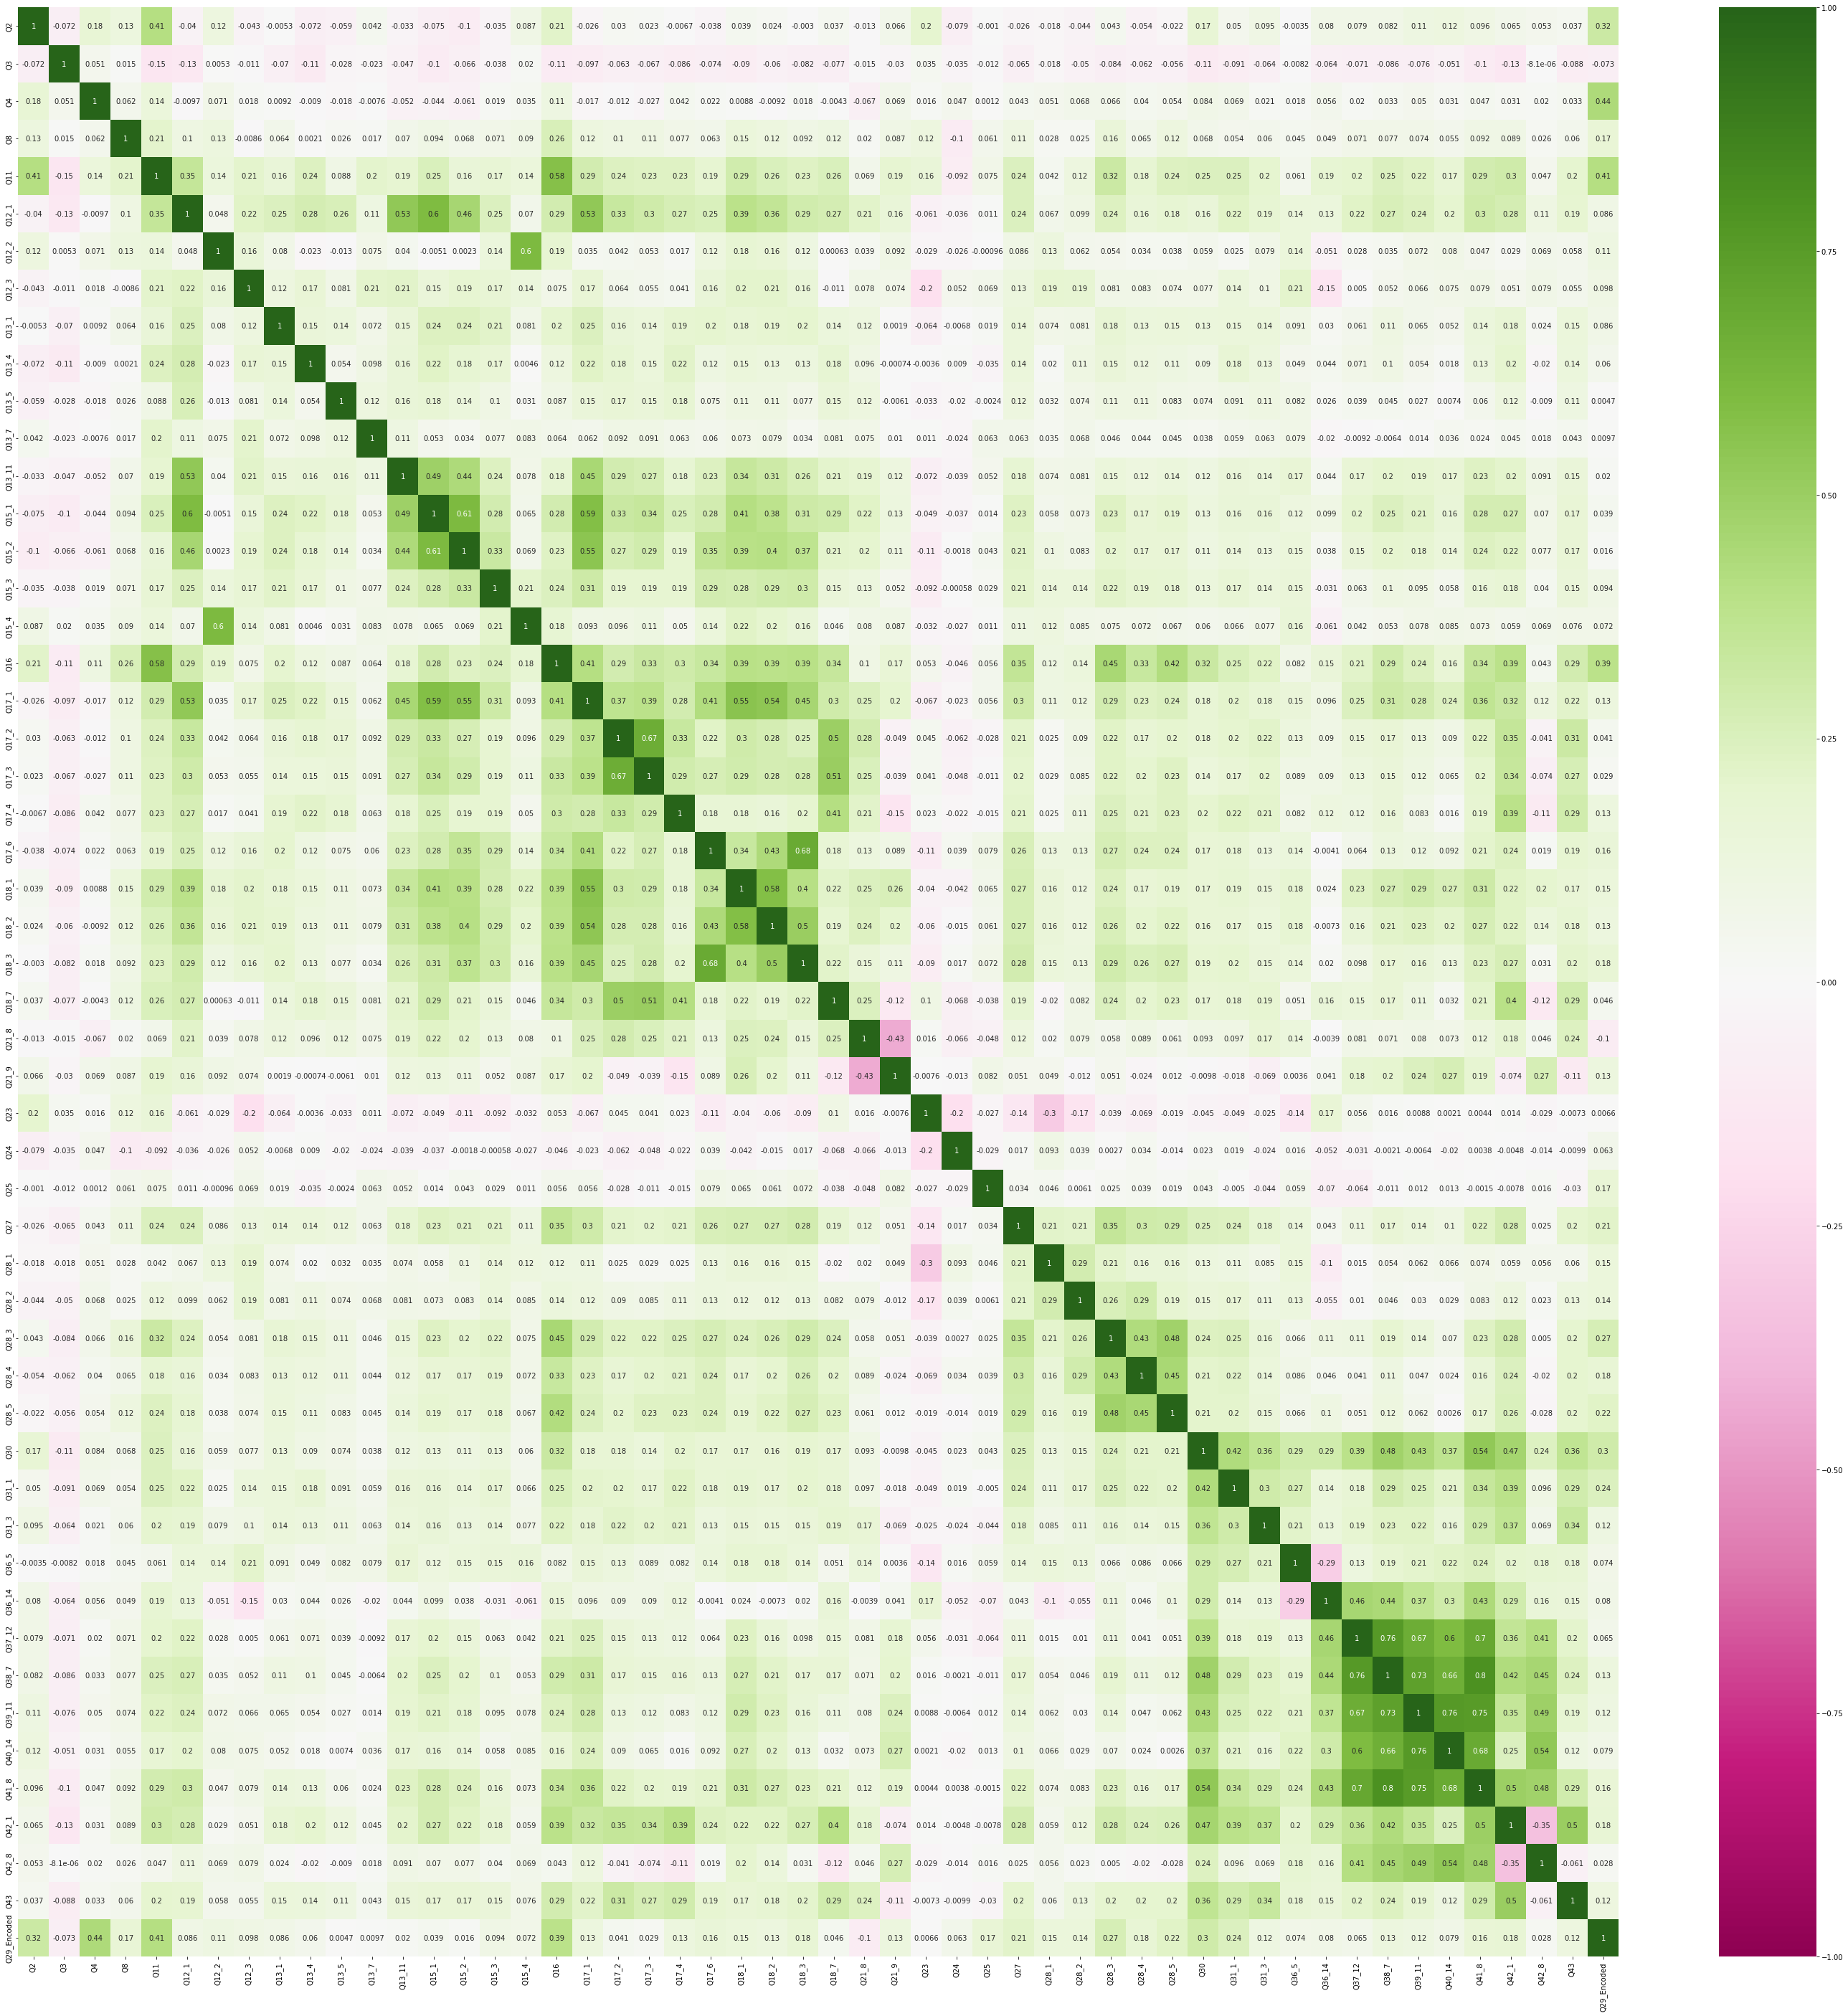

In [ ]:
# Correlation plot
cor = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor, vmin=-1, vmax=1, center= 0, cmap='PiYG', annot=True)
plt.show()

In [ ]:
# Feature Importance
cor_feature_imp = cor['Q29_Encoded'].sort_values(ascending=False)
cor_feature_imp

Q29_Encoded    1.000000
Q4             0.437203
Q11            0.406746
Q16            0.385459
Q2             0.315812
Q30            0.297743
Q28_3          0.270721
Q31_1          0.243671
Q28_5          0.223667
Q27            0.213171
Q28_4          0.179178
Q42_1          0.176165
Q18_3          0.175587
Q25            0.165711
Q8             0.165013
Q41_8          0.164268
Q17_6          0.159657
Q18_1          0.147361
Q28_1          0.145949
Q28_2          0.144128
Q38_7          0.132217
Q18_2          0.131922
Q21_9          0.128990
Q17_1          0.127521
Q17_4          0.125960
Q43            0.123890
Q39_11         0.117031
Q31_3          0.115303
Q12_2          0.111104
Q12_3          0.098310
Q15_3          0.093711
Q12_1          0.086176
Q13_1          0.085852
Q36_14         0.080119
Q40_14         0.078896
Q36_5          0.073966
Q15_4          0.071631
Q37_12         0.064677
Q24            0.063056
Q13_4          0.060028
Q18_7          0.046065
Q17_2          0

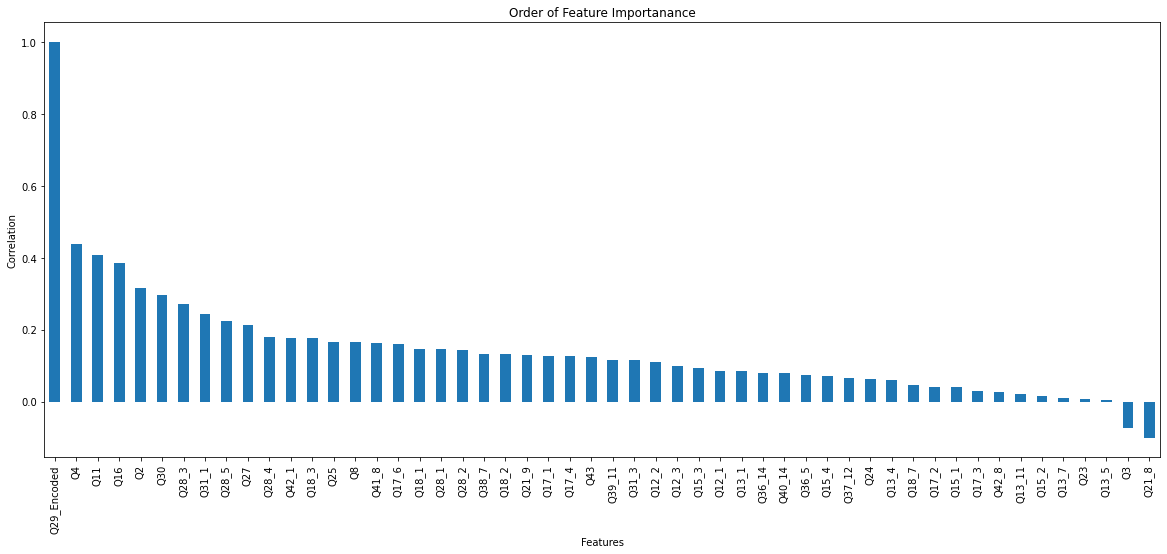

In [ ]:
# Plot of Feature Importance
cor_feature_imp.plot(kind='bar', figsize=(20,8))
plt.title('Order of Feature Importanance')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

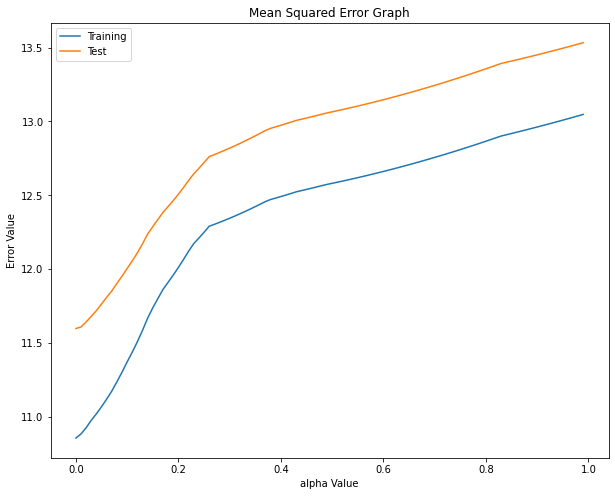

In [ ]:
# Performing Lasso regression for feature selection
X = df.drop('Q29_Encoded', axis = 1)
y = df['Q29_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
mse_train = []
mse_test = []
r2_score = []
r2_score_test = []
alpha_range = np.arange(0,1,0.01)
for i in alpha_range:
  L1 = Lasso(alpha=i, fit_intercept=False)
  L1.fit(X_train, y_train)
  y_Pred_train = L1.predict(X_train)
  y_Pred_test = L1.predict(X_test)
  r2 = L1.score(X_train, y_train)
  r2_test = L1.score(X_test, y_test)
  r2_score.append(r2)
  r2_score_test.append(r2_test)
  mse_train.append(mean_squared_error(y_train,y_Pred_train))
  mse_test.append(mean_squared_error(y_test,y_Pred_test))
plt.figure(figsize=(10,8))
plt.plot(alpha_range, mse_train, label='Training')
plt.plot(alpha_range, mse_test, label='Test')
plt.xlabel('alpha Value')
plt.ylabel('Error Value')
plt.title('Mean Squared Error Graph')
plt.legend()
plt.show()

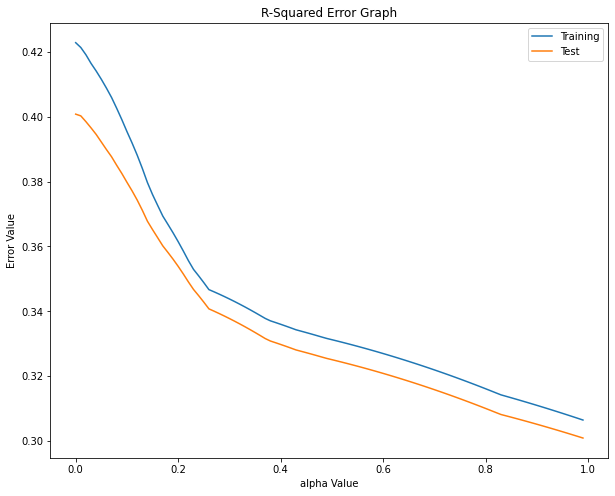

In [ ]:
# R2 score
plt.figure(figsize=(10,8))
plt.plot(alpha_range, r2_score, label='Training')
plt.plot(alpha_range, r2_score_test, label='Test')
plt.xlabel('alpha Value')
plt.ylabel('Error Value')
plt.title('R-Squared Error Graph')
plt.legend()
plt.show()

In [ ]:
L1 = Lasso(alpha=0.05, fit_intercept=False)
L1.fit(X_train, y_train)
print(L1.coef_)
print('Total number of features selected after feature selection: ', np.sum(L1.coef_!=0))

[ 0.14181852 -0.11782603  0.07556437 -0.11568905  0.44341972 -0.73916688
  0.         -0.          0.         -0.         -0.         -0.29682084
 -0.18825381 -0.07381473 -0.02685902 -0.         -0.          0.34683315
  0.         -0.14186706 -0.25725674  0.          0.          0.
  0.          0.02657705 -0.19365662 -0.7879182  -0.         -0.10841382
 -0.00437492  0.20472774  0.01060583 -0.          0.          0.6061965
  0.          0.14233183  0.33197103  0.53027265 -0.         -0.
 -0.         -0.39930298 -0.         -0.         -0.03561381 -0.
 -0.         -0.         -0.        ]
Total number of features selected after feature selection:  26


In [ ]:
a = list(L1.coef_)
idx_coef = []
for i,j in enumerate(a):
  if j==0:
    idx_coef.append(i)
idx_coef

[6,
 7,
 8,
 9,
 10,
 15,
 16,
 18,
 21,
 22,
 23,
 24,
 28,
 33,
 34,
 36,
 40,
 41,
 42,
 44,
 45,
 47,
 48,
 49,
 50]

In [ ]:
# Deleted Columns
b = list(X_train.columns[idx_coef])
b

['Q12_2',
 'Q12_3',
 'Q13_1',
 'Q13_4',
 'Q13_5',
 'Q15_3',
 'Q15_4',
 'Q17_1',
 'Q17_4',
 'Q17_6',
 'Q18_1',
 'Q18_2',
 'Q21_9',
 'Q28_1',
 'Q28_2',
 'Q28_4',
 'Q31_3',
 'Q36_5',
 'Q36_14',
 'Q38_7',
 'Q39_11',
 'Q41_8',
 'Q42_1',
 'Q42_8',
 'Q43']

In [ ]:
# Columns Selected
df = df.drop(b,axis=1)
a = list(df.columns)
a

['Q2',
 'Q3',
 'Q4',
 'Q8',
 'Q11',
 'Q12_1',
 'Q13_7',
 'Q13_11',
 'Q15_1',
 'Q15_2',
 'Q16',
 'Q17_2',
 'Q17_3',
 'Q18_3',
 'Q18_7',
 'Q21_8',
 'Q23',
 'Q24',
 'Q25',
 'Q27',
 'Q28_3',
 'Q28_5',
 'Q30',
 'Q31_1',
 'Q37_12',
 'Q40_14',
 'Q29_Encoded']

In [ ]:
df

,Q2,Q3,Q4,Q8,Q11,Q12_1,Q13_7,Q13_11,Q15_1,Q15_2,Q16,Q17_2,Q17_3,Q18_3,Q18_7,Q21_8,Q23,Q24,Q25,Q27,Q28_3,Q28_5,Q30,Q31_1,Q37_12,Q40_14,Q29_Encoded
1,8,0,15,2.0,5.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4,11,0.0,4,1.0,1.0,3.0,0.0,1.0,0.0,2.0
2,3,0,16,3.0,5.0,1.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,11,6,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,10.0
3,10,0,2,5.0,6.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,10,5,3.0,4,1.0,0.0,2.0,1.0,1.0,1.0,10.0
4,5,0,55,5.0,5.0,1.0,0.0,1.0,0.0,1.0,6.0,1.0,1.0,1.0,1.0,0.0,5,3,3.0,3,1.0,0.0,2.0,1.0,0.0,0.0,13.0
5,5,0,55,4.0,5.0,1.0,0.0,0.0,1.0,1.0,6.0,1.0,1.0,1.0,0.0,0.0,4,3,3.0,3,1.0,1.0,5.0,1.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5,0,55,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2,1,4.0,3,1.0,1.0,0.0,0.0,0.0,0.0,10.0
8133,4,0,20,4.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,4,2,4.0,3,0.0,1.0,2.0,0.0,1.0,0.0,0.0
8134,5,0,20,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8135,2,0,51,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,6,4,4.0,1,0.0,0.0,2.0,0.0,1.0,1.0,2.0


# **Q3. Model implementation**

In [ ]:
X = df.drop('Q29_Encoded', axis = 1)
y = df['Q29_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
model = LogisticRegression()
n=y.nunique()
print("Total number of categories in target: ", n)
y.unique()

Total number of categories in target:  15


array([ 2., 10., 13., 12.,  9.,  3.,  0.,  5., 11.,  1.,  8., 14.,  7.,
        6.,  4.])

In [ ]:
y_train.value_counts()

0.0     2134
1.0      582
2.0      428
3.0      322
4.0      295
10.0     282
5.0      260
12.0     226
6.0      221
7.0      204
11.0     193
13.0     160
8.0      144
9.0      141
14.0     103
Name: Q29_Encoded, dtype: int64

In [ ]:
# Ordinal Logistic Regression
def Ordinal_LR(model, X_train, y_train, X_test, n=15):
  # model.fit(X_train, y_train)
  # train_prediction = model.predict(X_train)
  # df_binary=pd.DataFrame()
  prob_lst=[]
  p=0
  for i in range(0,n-1):
    y_binary = []
    for j in y_train:
      if j <= i:
        y_binary.append(0)
      else:
        y_binary.append(1)
    model.fit(X_train, y_binary)
    y_pred = model.predict_proba(X_test)
    # print(y_pred)
    # print(model.classes_)
    # df_binary["y_binary_{}".format(i)]=y_pred[:,0]
    if i==0 :
      prob = y_pred[:,0]
    else:
      prob = y_pred[:,0] - p
    prob_lst.append(prob)
    p = y_pred[:,0]
  prob_lst.append(y_pred[:,1])
  df_prob, predict = prediction(prob_lst)
  return df_prob, predict

In [ ]:
# Predicting the salary buckets
def prediction(prob_lst):
  df_prob = pd.DataFrame()
  for i,j in enumerate(prob_lst):
    df_prob[i]=prob_lst[i]
  predict = df_prob.idxmax(axis=1)
  return df_prob, predict

In [ ]:
# 10-Fold Cross Validation 
def run_kfold(model, X_train, y_train):
  scaler = StandardScaler()
  kf = KFold(n_splits=10)
  kf.get_n_splits(X_train)
  accuracy_train = []
  accuracy_val = []
  f1_score_train=[]
  f1_score_val=[]
  bias_lst=[]
  variance_lst=[]
  for train_index, test_index in kf.split(X_train):
    X_train_new, X_val = X_train.values[train_index], X_train.values[test_index]
    y_train_new, y_val = y_train.values[train_index], y_train.values[test_index]
    X_train_new = scaler.fit_transform(X_train_new)
    X_val = scaler.fit_transform(X_val)
    df_prob_train, predict_train = Ordinal_LR(model, X_train_new, y_train_new, X_train_new)
    df_prob_val, predict_val = Ordinal_LR(model, X_train_new, y_train_new, X_val)

    acc_train = accuracy_score(y_train_new, predict_train)*100
    acc_val = accuracy_score(y_val, predict_val)*100   # Accuracy 1
    accuracy_train.append(acc_train)
    accuracy_val.append(acc_val)
    
    f1_train = f1_score(y_train_new, predict_train, average='weighted')
    f1_val = f1_score(y_val, predict_val, average='weighted')
    f1_score_train.append(f1_train)
    f1_score_val.append(f1_val)

    bias = np.mean(predict_val - y_val)**2
    variance = np.mean((predict_val - np.mean(predict_val)) ** 2)
    bias_lst.append(np.mean(bias))
    variance_lst.append(np.mean(variance))
  return accuracy_train, accuracy_val, bias_lst, variance_lst, f1_score_train, f1_score_val

In [ ]:
results = run_kfold(model, X_train, y_train)

In [ ]:
res_ = pd.DataFrame(results)
res = res_.T
res = res.set_axis(["Accuracy_train", "Accuracy_val", "Bias", "Variance", "F1_train", "F1_val"], axis=1)
res

,Accuracy_train,Accuracy_val,Bias,Variance,F1_train,F1_val
0,40.917073,40.701754,2.265817,18.953183,0.290451,0.281825
1,41.053659,38.421053,1.613346,20.811154,0.293712,0.261165
2,41.385366,38.245614,2.690751,18.684484,0.298495,0.259494
3,41.287805,37.017544,2.044398,19.188640,0.296106,0.252236
4,40.663415,41.403509,1.735922,18.969655,0.289445,0.297834
5,40.909091,39.894552,1.802861,19.366625,0.291339,0.279327
6,41.065158,38.312830,3.730533,18.092710,0.291407,0.263776
7,41.104175,37.082601,1.614552,19.795714,0.291015,0.248711
8,40.967616,40.949033,1.850365,20.090524,0.296134,0.293983
9,40.714007,43.233743,1.496215,19.522475,0.288498,0.318615


In [ ]:
fold_train=0
fold_val=0
for i in res['Accuracy_train']:
  fold_train+=1
  print("Fold {0} training accuracy: {1}%".format(fold_train, round(i,3)))
mean_acc_train = np.mean(res['Accuracy_train'])
variance_train = np.var(res['Accuracy_train'])
print("Average training accuracy: {0}%".format(round(mean_acc_train,3)))
print("Variance of training accuracy: {0}\n".format(round(variance_train,3)))

for i in res['Accuracy_val']:
  fold_val+=1
  print("Fold {0} validation accuracy: {1}%".format(fold_val, round(i,3)))
mean_acc_val = np.mean(res['Accuracy_val'])
variance_val = np.var(res['Accuracy_val'])
print("Average validation accuracy: {0}%".format(round(mean_acc_val,3)))
print("Variance of validation accuracy: {0}".format(round(variance_val,3)))

Fold 1 training accuracy: 40.917%
Fold 2 training accuracy: 41.054%
Fold 3 training accuracy: 41.385%
Fold 4 training accuracy: 41.288%
Fold 5 training accuracy: 40.663%
Fold 6 training accuracy: 40.909%
Fold 7 training accuracy: 41.065%
Fold 8 training accuracy: 41.104%
Fold 9 training accuracy: 40.968%
Fold 10 training accuracy: 40.714%
Average training accuracy: 41.007%
Variance of training accuracy: 0.046

Fold 1 validation accuracy: 40.702%
Fold 2 validation accuracy: 38.421%
Fold 3 validation accuracy: 38.246%
Fold 4 validation accuracy: 37.018%
Fold 5 validation accuracy: 41.404%
Fold 6 validation accuracy: 39.895%
Fold 7 validation accuracy: 38.313%
Fold 8 validation accuracy: 37.083%
Fold 9 validation accuracy: 40.949%
Fold 10 validation accuracy: 43.234%
Average validation accuracy: 39.526%
Variance of validation accuracy: 3.741


In [ ]:
# Probability of belonging to each of the salary buckets
df_prob, predict = Ordinal_LR(model, X_train, y_train, X_train)
df_prob

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.453014,0.161074,0.104823,0.061061,0.036261,0.040393,0.056103,0.026835,0.016223,0.008966,0.019861,0.006939,0.001277,0.004134,0.003034
1,0.397605,0.141195,0.081204,0.094222,0.069513,0.044807,-0.017905,0.069231,0.034562,0.011080,0.041720,0.007035,0.015695,0.005890,0.004146
2,0.406211,0.099697,0.095654,-0.001905,0.068445,0.062345,0.049583,0.058453,0.056791,0.021275,0.038187,0.021215,0.014672,0.001451,0.007927
3,0.657869,0.156146,0.077589,0.034564,0.025899,0.008637,-0.002548,0.013731,0.011880,0.003310,0.006681,-0.000565,0.003277,0.001337,0.002193
4,0.672353,0.150506,0.075321,0.034485,0.025523,0.009343,0.006827,0.010150,0.006614,0.002230,0.003788,0.000246,0.001039,0.000864,0.000711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,0.442231,0.169859,0.074232,0.112259,0.041360,0.041655,-0.007450,0.048337,0.021425,0.012169,0.025266,-0.000969,0.008087,0.003036,0.008502
5691,0.579693,0.130054,0.085313,0.041149,0.040907,0.022335,0.025457,0.012809,0.027759,0.005279,0.016273,0.003024,0.005488,0.001431,0.003028
5692,0.262883,0.106212,0.203757,0.124259,0.071926,0.003979,0.042723,0.067202,0.032959,0.015593,0.021257,0.015167,0.017734,0.010011,0.004340
5693,0.232650,0.163694,0.129037,0.124463,0.054464,0.096244,-0.029981,0.083039,0.036379,0.023017,0.048286,0.001480,0.020518,0.010727,0.005986


In [ ]:
# Bias-Variance trade-off
C = [0.0001,0.0005,0.001,0.01,0.05,0.1,0.5,1]
Bias = []
Variance = []
for c in C:
  model_C = LogisticRegression(C=c)
  accuracy_train, accuracy_val, bias_lst, variance_lst, f1_train, f1_val = run_kfold(model_C, X_train, y_train)
  Bias.append(np.mean(bias_lst))
  Variance.append(np.mean(variance_lst))

In [ ]:
print(Bias)
print(Variance)

[13.925224354983026, 12.201855384067972, 8.953201280721412, 3.163323406040746, 2.318978974724077, 2.2117477415620264, 2.0934693956239765, 2.0844759200667315]
[0.0, 2.589158589063636, 7.930770318086923, 17.37903602152905, 18.82622915291767, 19.081767215425465, 19.326446844005456, 19.347516376226704]


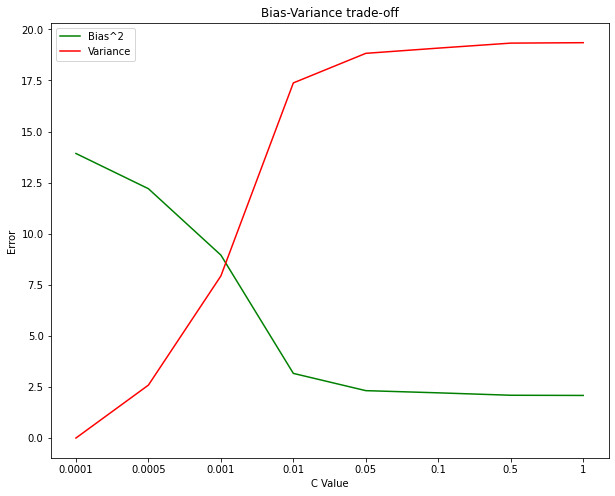

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(Bias, label='Bias^2', color = 'green')
plt.plot(Variance,  label='Variance', color = 'red')
plt.xlabel('C Value')
plt.xticks(np.arange(len(C)), C)
plt.ylabel('Error')
plt.title('Bias-Variance trade-off')
plt.legend()
plt.show()

In [ ]:
# Mean Squared Error
MSE = []
for i in range(0,len(C)):
  mse_ = Bias[i]+Variance[i]
  MSE.append(mse_)
MSE

[13.925224354983026,
 14.791013973131609,
 16.883971598808337,
 20.542359427569796,
 21.145208127641745,
 21.29351495698749,
 21.419916239629433,
 21.431992296293437]

In [ ]:
a = min(MSE)
idx = MSE.index(a)
print("The value of C for mininum mean squared error is: ", C[idx])

The value of C for mininum mean squared error is:  0.0001


In [ ]:
# Accuracy for the best performed model 
model_ht = LogisticRegression(C=0.0001)
accuracy_train, accuracy_val, bias_lst, variance_lst, f1_train, f1_val = run_kfold(model_ht, X_train, y_train)

In [ ]:
for i,j in enumerate(accuracy_train):
  print("Fold {0} training accuracy: {1}%".format(i+1, round(j,3)))
mean_acc_train = np.mean(accuracy_train)
variance_train = np.var(accuracy_train)
print("Average training accuracy: {0}%".format(round(mean_acc_train,3)))
print("Variance of training accuracy: {0}\n".format(round(variance_train,3)))

for i,j in enumerate(accuracy_val):
  print("Fold {0} validation accuracy: {1}%".format(i+1, round(j,3)))
mean_acc_val = np.mean(accuracy_val)
variance_val = np.var(accuracy_val)
print("Average validation accuracy: {0}%".format(round(mean_acc_val,3)))
print("Variance of validation accuracy: {0}\n".format(round(variance_val,3)))

Fold 1 training accuracy: 37.366%
Fold 2 training accuracy: 37.522%
Fold 3 training accuracy: 37.62%
Fold 4 training accuracy: 37.834%
Fold 5 training accuracy: 37.171%
Fold 6 training accuracy: 37.378%
Fold 7 training accuracy: 37.671%
Fold 8 training accuracy: 37.807%
Fold 9 training accuracy: 37.222%
Fold 10 training accuracy: 37.124%
Average training accuracy: 37.471%
Variance of training accuracy: 0.06

Fold 1 validation accuracy: 38.421%
Fold 2 validation accuracy: 37.018%
Fold 3 validation accuracy: 36.14%
Fold 4 validation accuracy: 34.211%
Fold 5 validation accuracy: 40.175%
Fold 6 validation accuracy: 38.313%
Fold 7 validation accuracy: 35.677%
Fold 8 validation accuracy: 34.446%
Fold 9 validation accuracy: 39.719%
Fold 10 validation accuracy: 40.598%
Average validation accuracy: 37.472%
Variance of validation accuracy: 4.873



The best model is C = 0.0001

# **Q4. Model tuning**

In [ ]:
# F1 score metric
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
f1_list = []
best_f1 = 0
best_acc = 0
for c in C:
    for sol in solver:
      model = LogisticRegression(C=c, solver=sol)
      accuracy_train, accuracy_val, bias_lst, variance_lst, f1_train, f1_val = run_kfold(model, X_train, y_train)
      if np.mean(f1_val) > best_f1:
        best_model = model
        best_params = {'C':c, 'solver':sol}
        best_f1 = np.mean(f1_val)
        best_acc = np.mean(accuracy_val)
    print("C: ", c)
print ("Best parameters: ", best_params)
print ("Best F1 Score: ", best_f1)
print("Accuracy for best f1 score: ", best_acc)

C:  0.0001
C:  0.0005
C:  0.001
C:  0.01
C:  0.05
C:  0.1
C:  0.5
C:  1
Best parameters:  {'C': 1, 'solver': 'liblinear'}
Best F1 Score:  0.2760263735562934
Accuracy for best f1 score:  39.54376715074152


In [ ]:
best_model = LogisticRegression(C=1, solver='liblinear')
best_model.fit(X_train, y_train)
importance = best_model.coef_[0]
importances = pd.DataFrame(data={'Features': X_train.columns, 'Importance': importance})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances

,Features,Importance
15,Q21_8,0.577555
12,Q17_3,0.229353
5,Q12_1,0.223191
24,Q37_12,0.186030
11,Q17_2,0.147381
9,Q15_2,0.121014
14,Q18_7,0.108175
25,Q40_14,0.102577
6,Q13_7,0.101530
7,Q13_11,0.082071


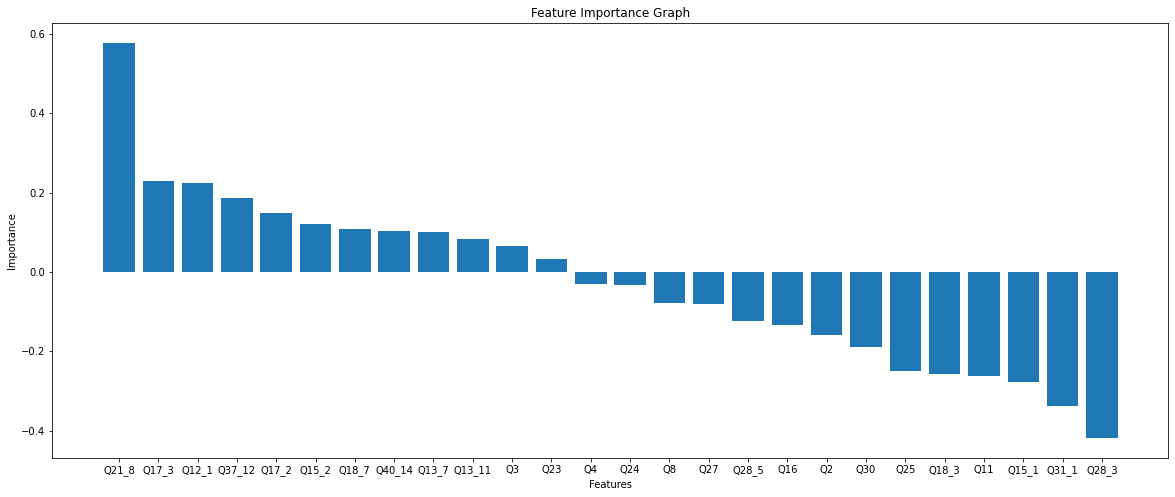

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(x=importances.Features, height=importances.Importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Graph')
plt.show()

In [ ]:
# Performing k-fold cross validation for the best model to calculate the accuracy
results = run_kfold(best_model, X_train, y_train)

In [ ]:
res_ = pd.DataFrame(results)
res = res_.T
res = res.set_axis(["Accuracy_train", "Accuracy_val", "Bias", "Variance", "F1_train", "F1_val"], axis=1)
res

,Accuracy_train,Accuracy_val,Bias,Variance,F1_train,F1_val
0,40.917073,40.877193,2.271102,18.920591,0.290350,0.284508
1,41.092683,38.421053,1.644694,20.786054,0.293846,0.260796
2,41.346341,38.421053,2.696510,18.669363,0.298104,0.262603
3,41.307317,36.842105,2.084731,19.091108,0.295916,0.250320
4,40.624390,41.403509,1.740548,18.933592,0.288861,0.298047
5,40.967616,39.894552,1.802861,19.366625,0.291906,0.279327
6,41.006633,38.312830,3.730533,18.092710,0.290586,0.263776
7,41.045650,37.082601,1.614552,19.795714,0.290239,0.248711
8,40.928599,40.949033,1.908185,19.936008,0.295349,0.293561
9,40.714007,43.233743,1.496215,19.522475,0.288441,0.318615


In [ ]:
fold_train=0
fold_val=0
for i in res['Accuracy_train']:
  fold_train+=1
  print("Fold {0} training accuracy: {1}%".format(fold_train, round(i,3)))
mean_acc_train = np.mean(res['Accuracy_train'])
variance_train = np.var(res['Accuracy_train'])
print("Average training accuracy: {0}%".format(round(mean_acc_train,3)))
print("Variance of training accuracy: {0}\n".format(round(variance_train,3)))

for i in res['Accuracy_val']:
  fold_val+=1
  print("Fold {0} validation accuracy: {1}%".format(fold_val, round(i,3)))
mean_acc_val = np.mean(res['Accuracy_val'])
variance_val = np.var(res['Accuracy_val'])
print("Average validation accuracy: {0}%".format(round(mean_acc_val,3)))
print("Variance of validation accuracy: {0}".format(round(variance_val,3)))

Fold 1 training accuracy: 40.917%
Fold 2 training accuracy: 41.093%
Fold 3 training accuracy: 41.346%
Fold 4 training accuracy: 41.307%
Fold 5 training accuracy: 40.624%
Fold 6 training accuracy: 40.968%
Fold 7 training accuracy: 41.007%
Fold 8 training accuracy: 41.046%
Fold 9 training accuracy: 40.929%
Fold 10 training accuracy: 40.714%
Average training accuracy: 40.995%
Variance of training accuracy: 0.046

Fold 1 validation accuracy: 40.877%
Fold 2 validation accuracy: 38.421%
Fold 3 validation accuracy: 38.421%
Fold 4 validation accuracy: 36.842%
Fold 5 validation accuracy: 41.404%
Fold 6 validation accuracy: 39.895%
Fold 7 validation accuracy: 38.313%
Fold 8 validation accuracy: 37.083%
Fold 9 validation accuracy: 40.949%
Fold 10 validation accuracy: 43.234%
Average validation accuracy: 39.544%
Variance of validation accuracy: 3.834


# **Q5. Testing & Discussion**

In [ ]:
# Accuracy for the test set on the best model
model_final = LogisticRegression(C=1, solver='liblinear')
model_final.fit(X_train, y_train)
predict_final_train = model_final.predict(X_train)
predict_final_test = model_final.predict(X_test)
accuracy_final_train = accuracy_score(y_train, predict_final_train)*100
accuracy_final_test = accuracy_score(y_test, predict_final_test)*100
print("The accuracy on the training set: {}%".format(round(accuracy_final_train,3)))
print("The accuracy on the test set: {}%".format(round(accuracy_final_test,3)))

The accuracy on the training set: 40.597%
The accuracy on the test set: 40.188%


In [ ]:
# Plot for determining the fit of the model
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
fold = 0
folds_lst = []
bias_lst_train = []
bias_lst = []
variance_lst_train = []
variance_lst = []
mse_train = []
mse_test = []
f1_score_train = []
f1_score_test = []
for train_idx, test_idx in kfold.split(X):
    fold+=1
    X_train_1, X_test_1 = X.values[train_idx], X.values[test_idx]
    y_train_1, y_test_1 = y.values[train_idx], y.values[test_idx]
    model_final.fit(X_train_1, y_train_1)
    train_predict = model_final.predict(X_train_1)
    test_predict = model_final.predict(X_test_1)
    mse_tra = mean_squared_error(y_train_1, train_predict)
    mse_tst = mean_squared_error(y_test_1, test_predict)
    mse_train.append(mse_tra)
    mse_test.append(mse_tst)
    folds_lst.append(fold)
    bias_tra = np.mean(train_predict - y_train_1)**2
    variance_tra = np.mean((train_predict - np.mean(train_predict)) ** 2)
    bias = np.mean(test_predict - y_test_1)**2
    variance = np.mean((test_predict - np.mean(test_predict)) ** 2)
    bias_lst.append(np.mean(bias))
    variance_lst.append(np.mean(variance))
    bias_lst_train.append(np.mean(bias_tra))
    variance_lst_train.append(np.mean(variance_tra))
    f1_train = f1_score(y_train_1, train_predict, average='weighted')
    f1_val = f1_score(y_test_1, test_predict, average='weighted')
    f1_score_train.append(f1_train)
    f1_score_test.append(f1_val)

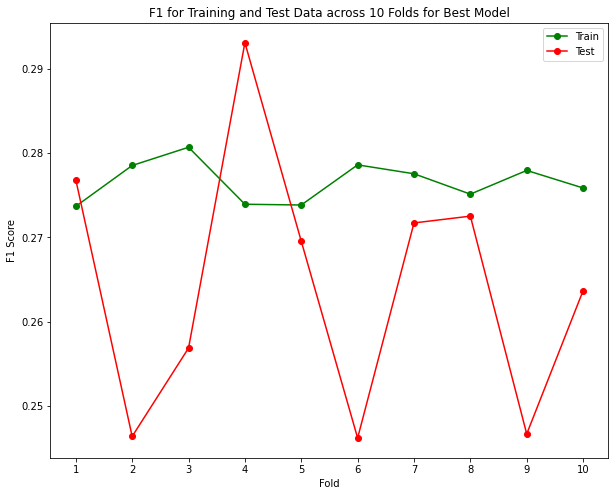

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(f1_score_train, 'o-', label='Train', color = 'green')
plt.plot(f1_score_test, 'o-', label='Test', color = 'red')
plt.xlabel('Fold')
plt.xticks(np.arange(len(folds_lst)), folds_lst)
plt.ylabel('F1 Score')
plt.title('F1 for Training and Test Data across 10 Folds for Best Model')
plt.legend()
plt.show()

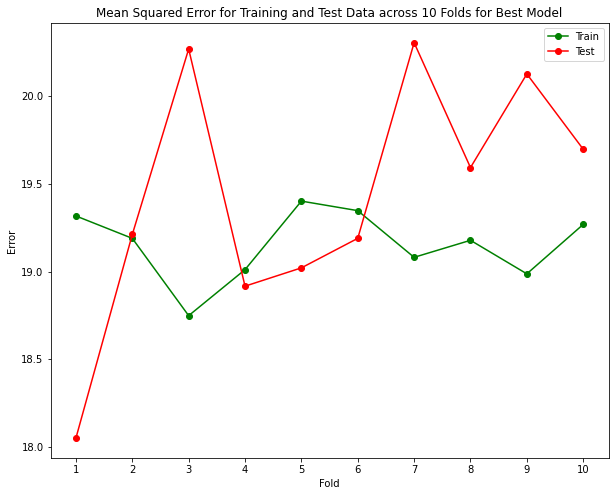

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(mse_train, 'o-', label='Train', color = 'green')
plt.plot(mse_test, 'o-', label='Test', color = 'red')
plt.xlabel('Fold')
plt.xticks(np.arange(len(folds_lst)), folds_lst)
plt.ylabel('Error')
plt.title('Mean Squared Error for Training and Test Data across 10 Folds for Best Model')
plt.legend()
plt.show()

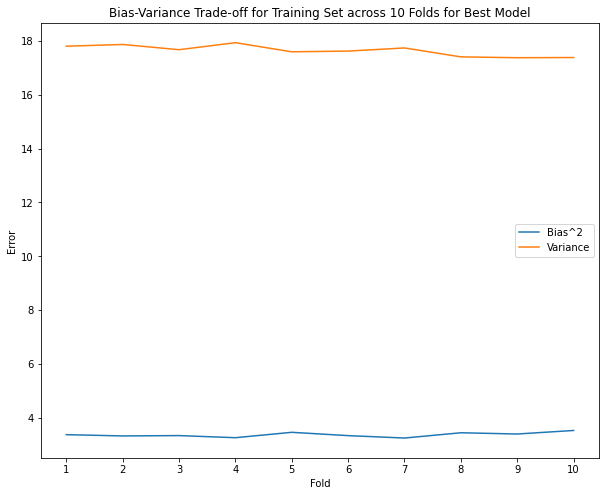

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias_lst_train, label='Bias^2')
plt.plot(variance_lst_train, label='Variance')
plt.xlabel('Fold')
plt.xticks(np.arange(len(folds_lst)), folds_lst)
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off for Training Set across 10 Folds for Best Model')
plt.legend()
plt.show()

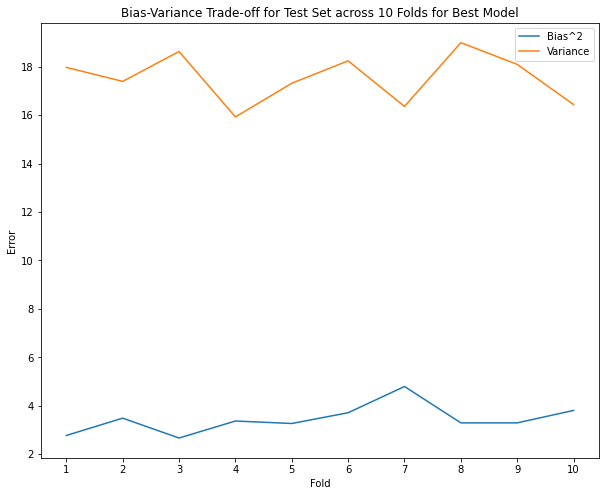

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(bias_lst, label='Bias^2')
plt.plot(variance_lst, label='Variance')
plt.xlabel('Fold')
plt.xticks(np.arange(len(folds_lst)), folds_lst)
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off for Test Set across 10 Folds for Best Model')
plt.legend()
plt.show()

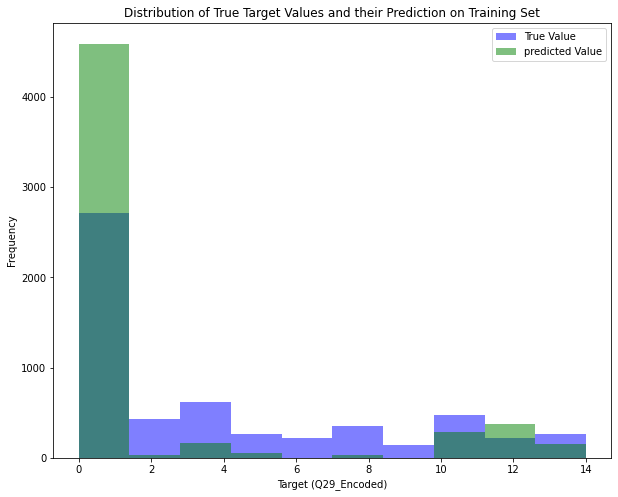

In [ ]:
# Plot of Distribution of True Target Values and their Prediction on Training Set
plt.figure(figsize=(10,8))
plt.hist(y_train, label = 'True Value', color = 'blue', alpha=0.5)
plt.hist(predict_final_train, label = 'predicted Value', color = 'green', alpha=0.5)
plt.xlabel("Target (Q29_Encoded)")
plt.ylabel('Frequency')
plt.title('Distribution of True Target Values and their Prediction on Training Set')
plt.legend()
plt.show()

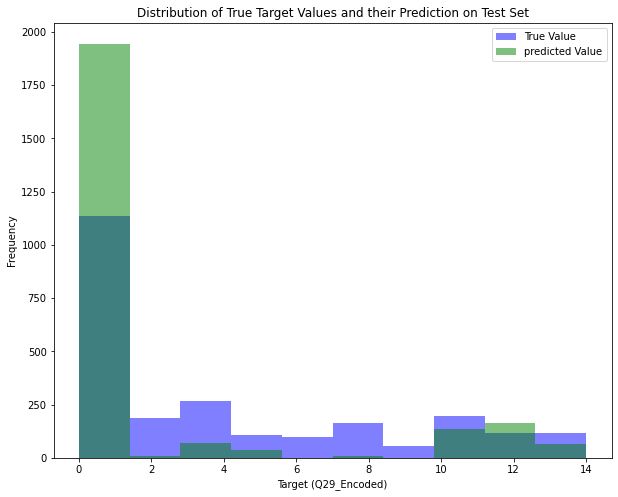

In [ ]:
# Plot of Distribution of True Target Values and their Prediction on Test Set
plt.figure(figsize=(10,8))
plt.hist(y_test, label = 'True Value', color = 'blue', alpha=0.5)
plt.hist(predict_final_test, label = 'predicted Value', color = 'green', alpha=0.5)
plt.xlabel("Target (Q29_Encoded)")
plt.ylabel('Frequency')
plt.title('Distribution of True Target Values and their Prediction on Test Set')
plt.legend()
plt.show()